# Бейзлайн для решения домашнего задания на kaggle

## Загрузка датасета

Для прямой загрузки датасетов с kaggle, необходимо получить API токен.

Для этого заходите на kaggle в настройки аккаунта и сгенерируйте свой API токен.
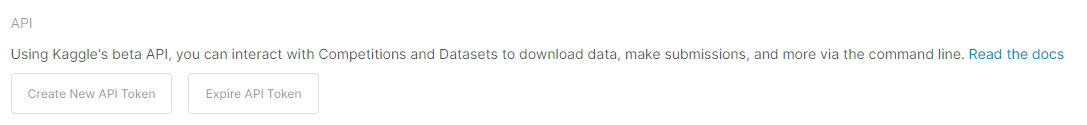

In [ ]:
# Установим библиотеку для работы с датасетами на kaggle
!pip install opendatasets --quiet

In [ ]:
import opendatasets as od

# Загрузим датасет на прямую с kaggle
dataset_url = 'https://www.kaggle.com/competitions/tutors-lessons-prices-prediction'

# Upload Kaggle.json file to Colab… (Caution: Do not Share kaggle.json as contains API key of your Kaggle Account)

od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: adele1997
Your Kaggle Key: ··········


100%|██████████| 2.56M/2.56M [00:00<00:00, 167MB/s]


Extracting archive ./tutors-lessons-prices-prediction/tutors-lessons-prices-prediction.zip to ./tutors-lessons-prices-prediction


In [ ]:
import pandas as pd

train = pd.read_excel('/content/tutors-lessons-prices-prediction/train.xlsx')
test = pd.read_excel('/content/tutors-lessons-prices-prediction/test.xlsx')
sample_submit = pd.read_csv('/content/tutors-lessons-prices-prediction/sample_submit.csv')

In [ ]:
train.head(2)

,Unnamed: 0,предмет,ФИО,tutor_head_tags,tutor_rating,tutor_reviews,description,experience_desc,Education_1,Desc_Education_1,...,status,experience,Desc_Education_5,Desc_Education_6,Education_5,Education_6,Ученая степень 2,Ученое звание 2,categories,mean_price
0,0,matematika,Репетитор по математике Емельянова Марина Вла...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",5.0,2,Репетитор не предоставил о себе дополн...,NaN,Томский государственный университет им. В.В. ...,"Год окончания: 1990, Факультет: механико-мате...",...,Университетский преподаватель,31 год,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",16.666667
1,1,matematika,Репетитор по математике Назарова Анастасия Ан...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",4.0,7,Репетитор не предоставил о себе дополн...,NaN,Вологодский государственный педагогический ун...,"Год окончания: 2017, Факультет: факультет при...",...,Школьный преподаватель,8 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",11.666667


In [ ]:
test.head(2)

,Unnamed: 0,предмет,ФИО,tutor_head_tags,tutor_rating,tutor_reviews,description,experience_desc,Education_1,Desc_Education_1,...,Ученое звание 1,status,experience,Desc_Education_5,Desc_Education_6,Education_5,Education_6,Ученая степень 2,Ученое звание 2,categories
0,0,matematika,Репетитор по математике Тихонова Наталья Бори...,"['Школьная программа', 'Подготовка к ЕГЭ', 'Ан...",4,13,Дистанционное убучение по Skype с прим...,NaN,Петрозаводский государственный университет,"Год окончания: 1981, Факультет: физико-матема...",...,NaN,Частный преподаватель,26 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п..."
1,1,matematika,Репетитор по математике Худайбердина Милана Р...,"['Школьная программа', 'Математический анализ'...",0,0,Буду рада помочь в освоении дисциплин ...,NaN,"Национальный исследовательский университет ""В...","Год окончания: 2022, Факультет: Московский ин...",...,NaN,Студент,4 года,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п..."


In [ ]:
sample_submit.head(2)

,index,mean_price
0,0,19.878115
1,1,0.903784


**Что мы видим?**

- `train` - это датасет, на котором мы будем учится (подбирать лучшую стратегию обработки данных, лучшие модели и обучать их собственно)
- `test` - это датасет, для которого ответы нам неизвестны и нам надо их найти и загрузить в систему. Ответы для него мы будем предсказывать когда выберем лучшую стратегию на `train`
- `sample_submit` - пример того как должны выглядить ответы

In [ ]:
print(train.shape)
print(test.shape)
print(sample_submit.shape)

(4548, 28)
(1516, 27)
(1516, 2)


## Исследование и предобработка данных

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4548 entries, 0 to 4547
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        4548 non-null   int64  
 1   предмет           4548 non-null   object 
 2   ФИО               4548 non-null   object 
 3   tutor_head_tags   4548 non-null   object 
 4   tutor_rating      3959 non-null   float64
 5   tutor_reviews     4548 non-null   int64  
 6   description       4547 non-null   object 
 7   experience_desc   2171 non-null   object 
 8   Education_1       4548 non-null   object 
 9   Desc_Education_1  4472 non-null   object 
 10  Education_2       781 non-null    object 
 11  Desc_Education_2  777 non-null    object 
 12  Education_3       106 non-null    object 
 13  Desc_Education_3  105 non-null    object 
 14  Education_4       16 non-null     object 
 15  Desc_Education_4  16 non-null     object 
 16  Ученая степень 1  76 non-null     object 


**Что видим?**
1. У нас очень много пропусков - придется как то убирать
2. Много данных не числовые - придется кодировать

<Axes: ylabel='mean_price'>

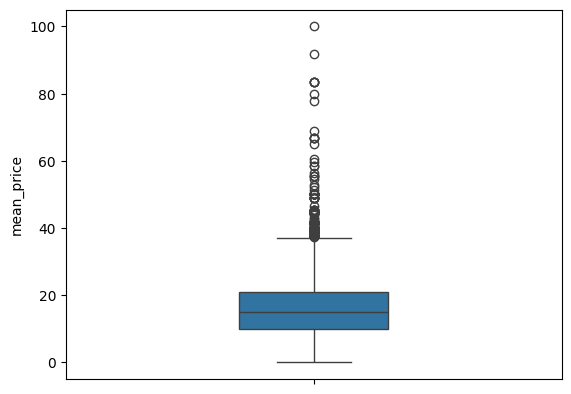

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(train['mean_price'], width=0.3)

Очень много выбросов в целевой переменной, а мы помним что для линейной модели - это плохо, она чувствительная к выбросам.

In [ ]:
# можем закодировать переменную
train['предмет'].value_counts()

,count
предмет,
matematika,3685
informatika,863


In [ ]:
# как ее можно закодировать?

# либо через labelencoder() либо через get_dummies()
train = pd.get_dummies(train, columns=['предмет'])
train.head(2)

,Unnamed: 0,ФИО,tutor_head_tags,tutor_rating,tutor_reviews,description,experience_desc,Education_1,Desc_Education_1,Education_2,...,Desc_Education_5,Desc_Education_6,Education_5,Education_6,Ученая степень 2,Ученое звание 2,categories,mean_price,предмет_informatika,предмет_matematika
0,0,Репетитор по математике Емельянова Марина Вла...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",5.0,2,Репетитор не предоставил о себе дополн...,NaN,Томский государственный университет им. В.В. ...,"Год окончания: 1990, Факультет: механико-мате...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",16.666667,False,True
1,1,Репетитор по математике Назарова Анастасия Ан...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",4.0,7,Репетитор не предоставил о себе дополн...,NaN,Вологодский государственный педагогический ун...,"Год окончания: 2017, Факультет: факультет при...",Череповецкий государственный университет,...,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",11.666667,False,True


In [ ]:
train['status'].value_counts()

,count
status,
Частный преподаватель,2345
Студент,1288
Школьный преподаватель,558
Университетский преподаватель,129
"Частный преподаватель, Студент",92
"Университетский преподаватель, Школьный преподаватель",47
Аспирант или ординатор очной формы обучения,45
"Аспирант или ординатор очной формы обучения, Частный преподаватель",15
"Университетский преподаватель, Аспирант или ординатор очной формы обучения",13


In [ ]:
train['status'].str.get_dummies(sep=',')

,Аспирант или ординатор очной формы обучения,Студент,Университетский преподаватель,Частный преподаватель,Школьный преподаватель
0,0,0,1,0,0
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
4543,0,0,0,1,0
4544,0,0,0,0,1
4545,0,1,0,0,0
4546,0,1,0,0,0


In [ ]:
# можем убрать слово год,лет,года и оставить только цифру - тем самым закодировав
train['experience'].unique()

array([' 31 год ', ' 8 лет ', ' 11 лет ', ' 5 лет ', ' 19 лет ',
       ' 7 лет ', ' 27 лет ', ' 9 лет ', ' 38 лет ', ' 28 лет ',
       ' 17 лет ', ' 6 лет ', ' 13 лет ', ' 45 лет ', ' 4 года ',
       ' 3 года ', ' 10 лет ', ' 2 года ', ' 14 лет ', ' 20 лет ',
       ' 18 лет ', ' 32 года ', ' 16 лет ', ' 21 год ', ' 15 лет ',
       ' 12 лет ', ' 1 год ', ' 24 года ', ' 29 лет ', ' 22 года ',
       ' 39 лет ', ' 23 года ', ' 25 лет ', ' 34 года ', nan, ' 33 года ',
       ' 43 года ', ' 36 лет ', ' 40 лет ', ' 26 лет ', ' 41 год ',
       ' 30 лет ', ' 42 года ', ' 37 лет ', ' 35 лет ', ' 47 лет ',
       ' 44 года ', ' 53 года ', ' 55 лет ', ' 68 лет ', ' 48 лет ',
       ' 52 года ', ' 50 лет ', ' 46 лет ', ' 51 год ', ' 54 года '],
      dtype=object)

In [ ]:
# Оставим только числа в колонке
train['experience'] = train['experience'].str.replace(r"[^\d\.]", "", regex=True)
# преобразуем колонку в числовой формат
train['experience'] = train['experience'].astype('float64')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4548 entries, 0 to 4547
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           4548 non-null   int64  
 1   ФИО                  4548 non-null   object 
 2   tutor_head_tags      4548 non-null   object 
 3   tutor_rating         3959 non-null   float64
 4   tutor_reviews        4548 non-null   int64  
 5   description          4547 non-null   object 
 6   experience_desc      2171 non-null   object 
 7   Education_1          4548 non-null   object 
 8   Desc_Education_1     4472 non-null   object 
 9   Education_2          781 non-null    object 
 10  Desc_Education_2     777 non-null    object 
 11  Education_3          106 non-null    object 
 12  Desc_Education_3     105 non-null    object 
 13  Education_4          16 non-null     object 
 14  Desc_Education_4     16 non-null     object 
 15  Ученая степень 1     76 non-null     o

In [ ]:
# давайте эту переменную закодируем
train['categories']

,categories
0,"['Школьники с 5 по 9 класс', 'Школьники с 10 п..."
1,"['Школьники с 5 по 9 класс', 'Школьники с 10 п..."
2,"['Школьники с 5 по 9 класс', 'Школьники с 10 п..."
3,"['Школьники с 1 по 4 класс', 'Школьники с 5 по..."
4,"['Школьники с 5 по 9 класс', 'Школьники с 10 п..."
...,...
4543,"['Школьники с 1 по 4 класс', 'Школьники с 5 по..."
4544,['Школьники с 5 по 9 класс']
4545,"['Школьники с 5 по 9 класс', 'Школьники с 10 п..."
4546,"['Школьники с 5 по 9 класс', 'Школьники с 10 п..."


In [ ]:
print(type(train.loc[0, 'categories']))
train.loc[0, 'categories']

<class 'str'>


"['Школьники с 5 по 9 класс', 'Школьники с 10 по 11 класс, студенты колледжей и техникумов, абитуриенты']"

In [ ]:
import ast
train['categories'] = train['categories'].apply(lambda s: list(ast.literal_eval(s)))

print(type(train.loc[0, 'categories']))
train.loc[0, 'categories']

<class 'list'>


['Школьники с 5 по 9 класс',
 'Школьники с 10 по 11 класс, студенты колледжей и техникумов, абитуриенты']

In [ ]:
# Теперь воспользуемся умным кодировщиком из библиотеки sklearn

import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer

# Инициализация MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Применение MultiLabelBinarizer к колонке 'genres'
genres_encoded = mlb.fit_transform(train['categories'])
genres_encoded

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 1, 0]])

In [ ]:
# Создание нового DataFrame с закодированными жанрами
genres_df = pd.DataFrame(genres_encoded, columns=mlb.classes_)

# Соединение с исходным DataFrame
train = pd.concat([train, genres_df], axis=1)

genres_df

,Взрослые кроме абитуриентов и студентов,Взрослые кроме абитуриентов и студентов в паре,Взрослые кроме абитуриентов и студентов группа,Дошкольники,Дошкольники в паре,Дошкольники группа,Студенты университетов,Студенты университетов в паре,Школьники с 1 по 4 класс,Школьники с 1 по 4 класс в паре,Школьники с 1 по 4 класс группа,"Школьники с 10 по 11 класс, студенты колледжей и техникумов, абитуриенты","Школьники с 10 по 11 класс, студенты колледжей и техникумов, абитуриенты в паре","Школьники с 10 по 11 класс, студенты колледжей и техникумов, абитуриенты группа",Школьники с 5 по 9 класс,Школьники с 5 по 9 класс в паре,Школьники с 5 по 9 класс группа
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4543,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0
4544,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4545,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4546,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [ ]:
# Соединение с исходным DataFrame
train = pd.concat([train, genres_df], axis=1)
train.head(2)

,Unnamed: 0,ФИО,tutor_head_tags,tutor_rating,tutor_reviews,description,experience_desc,Education_1,Desc_Education_1,Education_2,...,Студенты университетов в паре,Школьники с 1 по 4 класс,Школьники с 1 по 4 класс в паре,Школьники с 1 по 4 класс группа,"Школьники с 10 по 11 класс, студенты колледжей и техникумов, абитуриенты","Школьники с 10 по 11 класс, студенты колледжей и техникумов, абитуриенты в паре","Школьники с 10 по 11 класс, студенты колледжей и техникумов, абитуриенты группа",Школьники с 5 по 9 класс,Школьники с 5 по 9 класс в паре,Школьники с 5 по 9 класс группа
0,0,Репетитор по математике Емельянова Марина Вла...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",5.0,2,Репетитор не предоставил о себе дополн...,NaN,Томский государственный университет им. В.В. ...,"Год окончания: 1990, Факультет: механико-мате...",NaN,...,0,0,0,0,1,0,0,1,0,0
1,1,Репетитор по математике Назарова Анастасия Ан...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",4.0,7,Репетитор не предоставил о себе дополн...,NaN,Вологодский государственный педагогический ун...,"Год окончания: 2017, Факультет: факультет при...",Череповецкий государственный университет,...,0,0,0,0,1,0,0,1,0,0


In [ ]:
train.loc[11,'description']

'        Я закончил физико-математический лицей № 131 в г. Казани, после чего поступил в МГСУ, но мой выбор оказался ошибочным. В МГСУ мне не хватало инженерной нагрузки, в связи с чем я спустя два года поступил в МГТУ им. Баумана и успешно его закончил. Главный принцип всего обучения моего собственного и как преподавателя: "бесполезно зубрить что-либо, надо понимать". Также придерживаюсь позиции что не существует единственного правильного решения. Я очень спокойный доброжелательный человек.    '

In [ ]:
# Можно точно также как колонку categories обработать
train['tutor_head_tags']

,tutor_head_tags
0,"['Школьная программа', 'Подготовка к ЕГЭ', 'По..."
1,"['Школьная программа', 'Подготовка к ЕГЭ', 'По..."
2,"['Школьная программа', 'Подготовка к ЕГЭ', 'По..."
3,"['Школьная программа', 'Математический анализ'..."
4,"['Школьная программа', 'Подготовка к ЕГЭ', 'По..."
...,...
4543,"['Школьная программа', 'Математический анализ'..."
4544,"['Школьная программа', 'Подготовка к ЕГЭ', 'По..."
4545,"['Школьная программа', 'Подготовка к ЕГЭ', 'По..."
4546,"['Школьная программа', 'Подготовка к ЕГЭ', 'По..."


In [ ]:
# Можно например отдельно извлечь год окончания университета, факультет и т д
train['Desc_Education_1']

,Desc_Education_1
0,"Год окончания: 1990, Факультет: механико-мате..."
1,"Год окончания: 2017, Факультет: факультет при..."
2,"Год окончания: 2008, Факультет: Математически..."
3,"Год окончания: 2021, Факультет: физический фа..."
4,"Год окончания: 2005, Факультет: Энергетически..."
...,...
4543,"Год окончания: 2020, Факультет: физический фа..."
4544,"Год окончания: 1979, Факультет: Факультет авт..."
4545,"Год окончания: 2020, Факультет: Информационны..."
4546,"Год окончания: 2026, Факультет: Институт инфо..."


In [ ]:
train.loc[23, 'Desc_Education_1']

' Год окончания: 2005, Факультет: механико-математический факультет, Специальность: прикладная математика, Квалификация: Квалификация - математик. '

In [ ]:
numeric_cols = train.select_dtypes(include='number').columns

numeric_cols

Index(['Unnamed: 0', 'tutor_rating', 'tutor_reviews', 'experience',
       'mean_price', 'Взрослые кроме абитуриентов и студентов',
       'Взрослые кроме абитуриентов и студентов в паре',
       'Взрослые кроме абитуриентов и студентов группа', 'Дошкольники',
       'Дошкольники в паре', 'Дошкольники группа', 'Студенты университетов',
       'Студенты университетов в паре', 'Школьники с 1 по 4 класс',
       'Школьники с 1 по 4 класс в паре', 'Школьники с 1 по 4 класс группа',
       'Школьники с 10 по 11 класс, студенты колледжей и техникумов, абитуриенты',
       'Школьники с 10 по 11 класс, студенты колледжей и техникумов, абитуриенты в паре',
       'Школьники с 10 по 11 класс, студенты колледжей и техникумов, абитуриенты группа',
       'Школьники с 5 по 9 класс', 'Школьники с 5 по 9 класс в паре',
       'Школьники с 5 по 9 класс группа'],
      dtype='object')

In [ ]:
# возьмем только числовые колонки
train = train[numeric_cols]
train

,Unnamed: 0,tutor_rating,tutor_reviews,experience,mean_price,Взрослые кроме абитуриентов и студентов,Взрослые кроме абитуриентов и студентов в паре,Взрослые кроме абитуриентов и студентов группа,Дошкольники,Дошкольники в паре,...,Студенты университетов в паре,Школьники с 1 по 4 класс,Школьники с 1 по 4 класс в паре,Школьники с 1 по 4 класс группа,"Школьники с 10 по 11 класс, студенты колледжей и техникумов, абитуриенты","Школьники с 10 по 11 класс, студенты колледжей и техникумов, абитуриенты в паре","Школьники с 10 по 11 класс, студенты колледжей и техникумов, абитуриенты группа",Школьники с 5 по 9 класс,Школьники с 5 по 9 класс в паре,Школьники с 5 по 9 класс группа
0,0,5.0,2,31.0,16.666667,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,1,4.0,7,8.0,11.666667,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,2,0.0,0,11.0,23.333333,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,3,4.0,19,5.0,0.116667,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4,4,0.0,0,19.0,16.666667,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4543,4543,4.0,11,5.0,16.666667,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4544,4544,0.0,0,30.0,33.333333,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4545,4545,0.0,0,6.0,23.333333,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4546,4546,0.0,0,1.0,9.722222,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [ ]:
# удалим ненужную колонку
train.drop(columns=['Unnamed: 0'], inplace=True)
train

,tutor_rating,tutor_reviews,experience,mean_price,Взрослые кроме абитуриентов и студентов,Взрослые кроме абитуриентов и студентов в паре,Взрослые кроме абитуриентов и студентов группа,Дошкольники,Дошкольники в паре,Дошкольники группа,...,Студенты университетов в паре,Школьники с 1 по 4 класс,Школьники с 1 по 4 класс в паре,Школьники с 1 по 4 класс группа,"Школьники с 10 по 11 класс, студенты колледжей и техникумов, абитуриенты","Школьники с 10 по 11 класс, студенты колледжей и техникумов, абитуриенты в паре","Школьники с 10 по 11 класс, студенты колледжей и техникумов, абитуриенты группа",Школьники с 5 по 9 класс,Школьники с 5 по 9 класс в паре,Школьники с 5 по 9 класс группа
0,5.0,2,31.0,16.666667,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,4.0,7,8.0,11.666667,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,0.0,0,11.0,23.333333,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,4.0,19,5.0,0.116667,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4,0.0,0,19.0,16.666667,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4543,4.0,11,5.0,16.666667,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4544,0.0,0,30.0,33.333333,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4545,0.0,0,6.0,23.333333,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4546,0.0,0,1.0,9.722222,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [ ]:
train.isna().sum()

,0
tutor_rating,589
tutor_reviews,0
experience,25
mean_price,0
Взрослые кроме абитуриентов и студентов,0
Взрослые кроме абитуриентов и студентов в паре,0
Взрослые кроме абитуриентов и студентов группа,0
Дошкольники,0
Дошкольники в паре,0
Дошкольники группа,0


In [ ]:
# заполним пропуски
train['experience'] = train['experience'].fillna(train['experience'].mean())
train['tutor_rating'] = train['tutor_rating'].fillna(0)

train.isna().sum()

,0
tutor_rating,0
tutor_reviews,0
experience,0
mean_price,0
Взрослые кроме абитуриентов и студентов,0
Взрослые кроме абитуриентов и студентов в паре,0
Взрослые кроме абитуриентов и студентов группа,0
Дошкольники,0
Дошкольники в паре,0
Дошкольники группа,0


<Axes: >

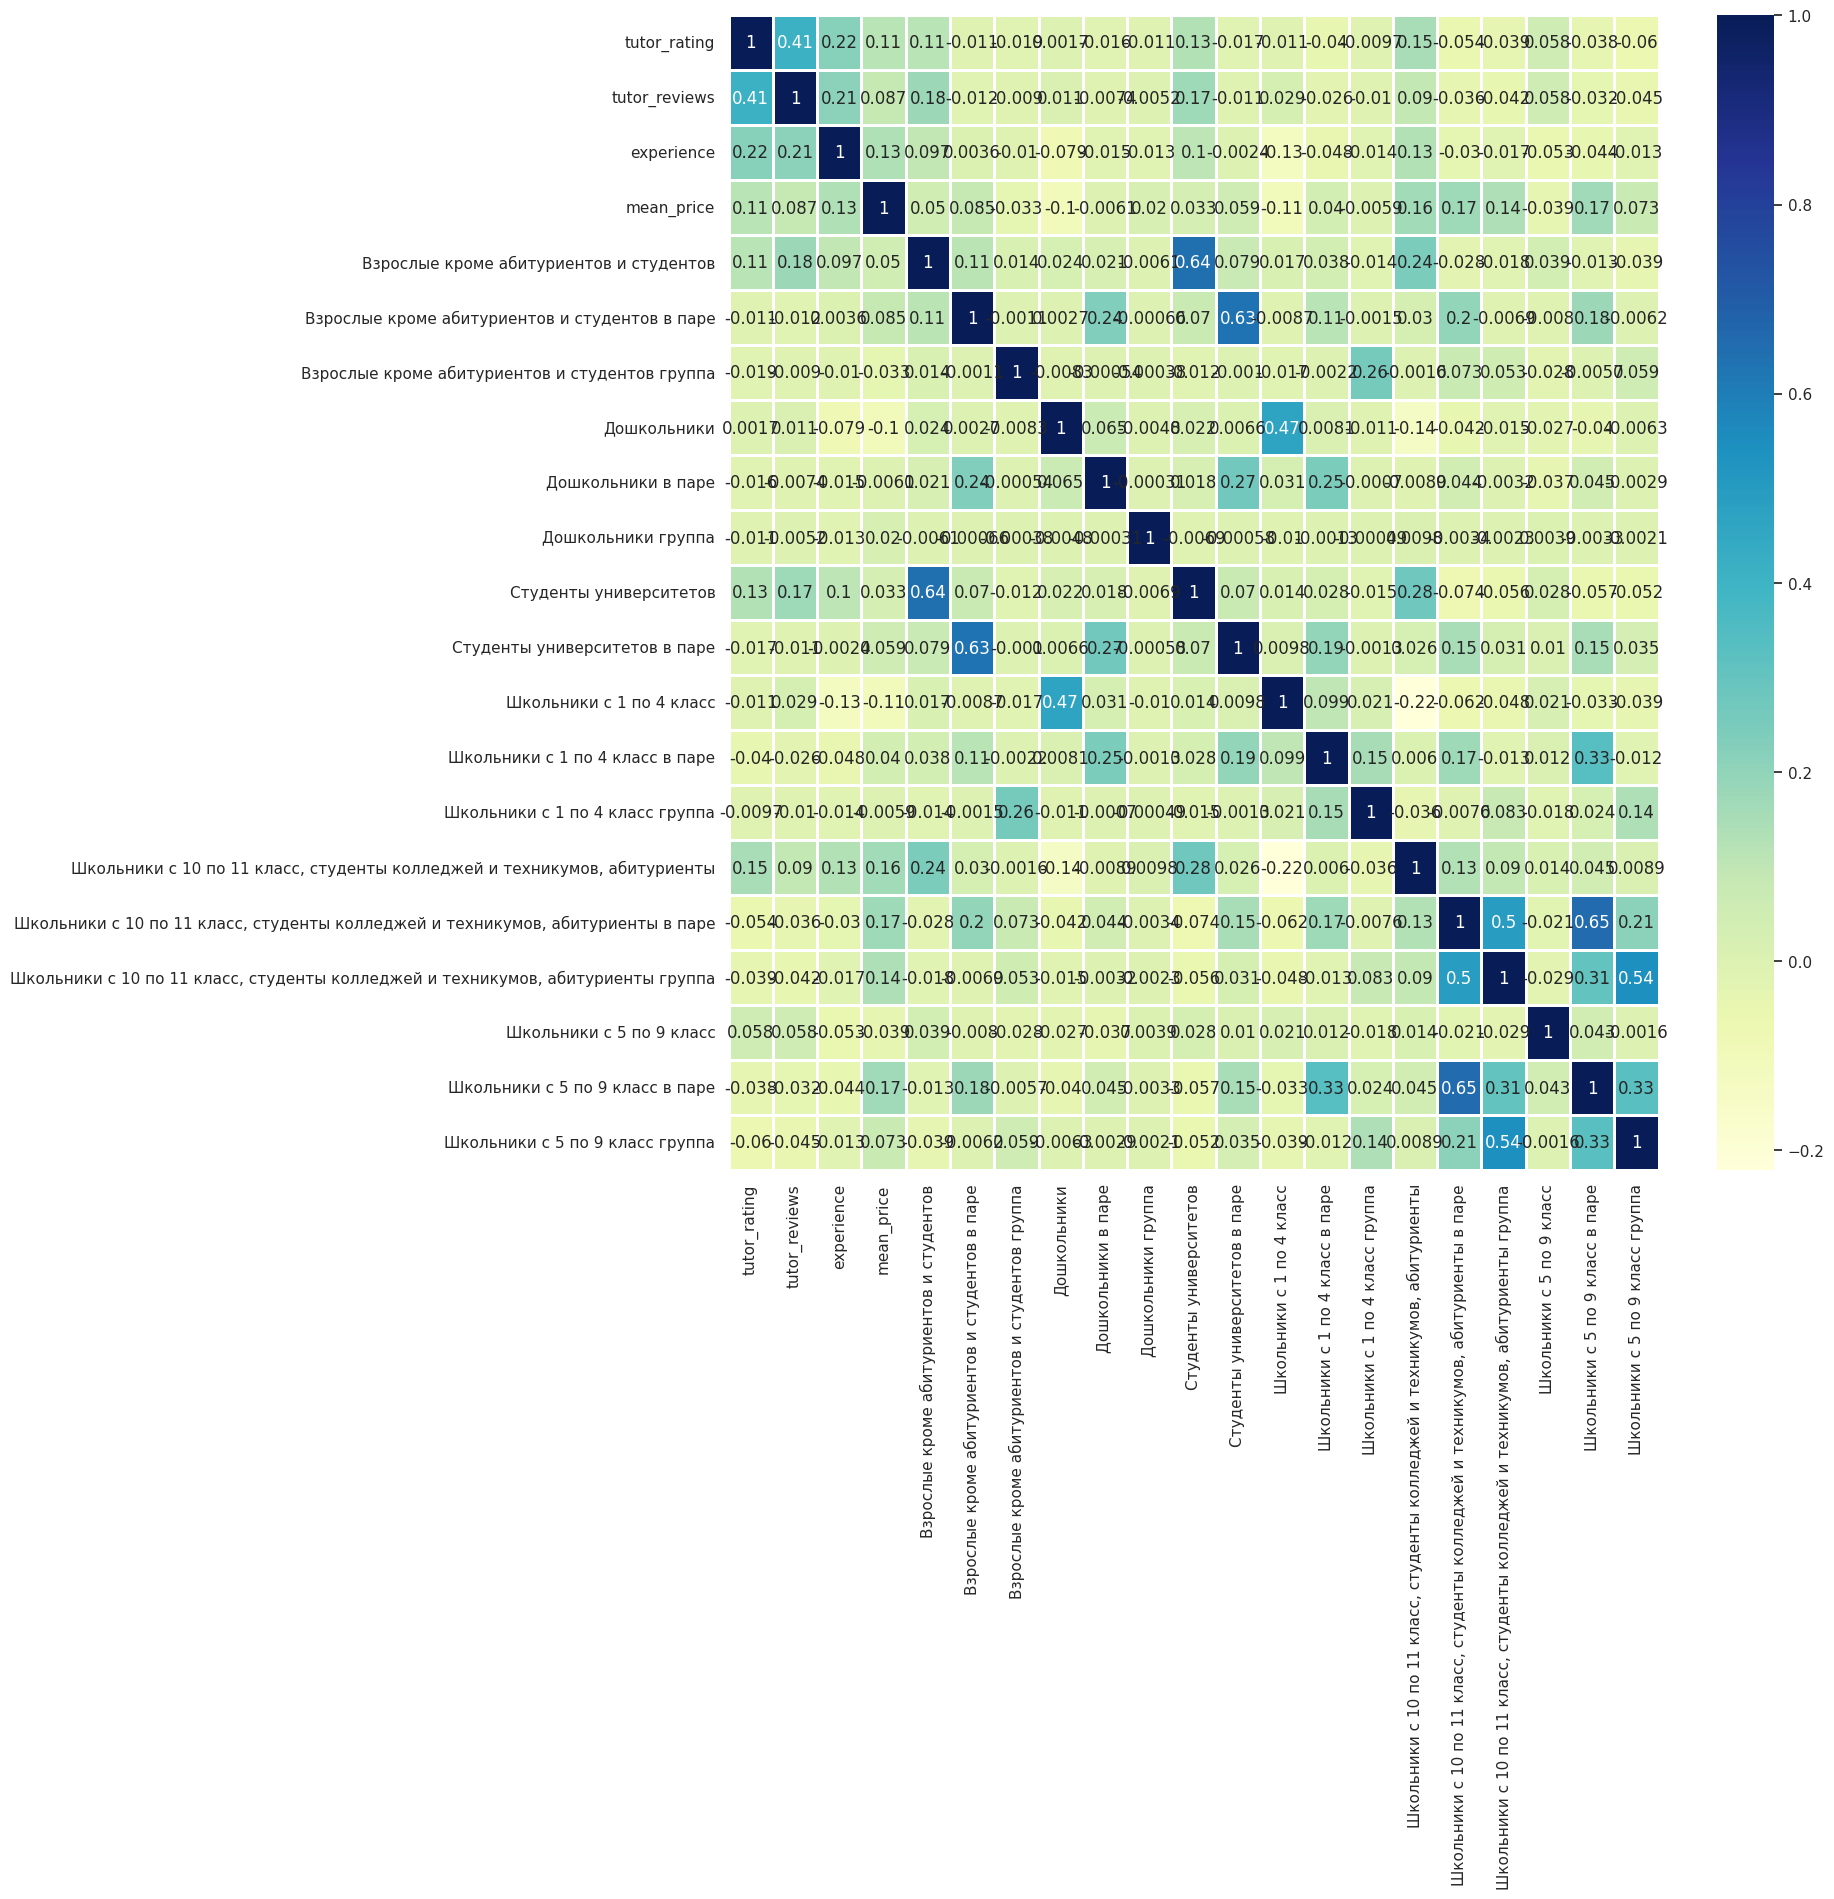

In [ ]:
sns.set(rc = {'figure.figsize':(15,15)})

sns.heatmap(train.corr(), annot = True, cmap="YlGnBu", linecolor='white',linewidths=1)

## Подготовка к обучению модели

In [ ]:
X = train.drop(columns=['mean_price'])
Y = train['mean_price']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

print(f'Train dataset size: {X_train.shape}, {y_train.shape}')
print(f'Test dataset size: {X_test.shape}, {y_test.shape}')

Train dataset size: (3183, 20), (3183,)
Test dataset size: (1365, 20), (1365,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Создаем модель линейной регрессии - т.е. прямой которая будет проходить через наши точки
# Эта операция создаёт переменную model в качестве экземпляра LinearRegression

lig_reg = LinearRegression()

# С помощью метода fit() применяем нашу модель к нашему набору данных - обучем модель
# С помощью .fit() вычисляются оптимальные значение весов w₀ и w₁ и т.д,
# используя существующие вход и выход (x и y) в качестве аргументов.

lig_reg.fit(X_train, y_train)

y_pred = lig_reg.predict(X_test)

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))

Mean Absolute Error: 7.53737113495117
Mean Squared Error: 109.50081641399068
R2 score: 0.054820164842944163


In [ ]:
# пример с кросс валидацией
from sklearn.model_selection import cross_val_score

lig_reg = LinearRegression()

scores = cross_val_score(lig_reg, X, Y, cv=5, scoring='neg_mean_squared_error')
scores
# -92.66547372 = +92.66547372

array([ -92.66547372, -101.74994294, -117.13454043,  -94.10301468,
       -102.78144488])

## Предсказание для `test`

Допустим мы подобрали лучшие шаги по предобработке, лучшую модель, получили хорошие результаты, теперь осталось обучить выбранную модель на всем наборе `train` и сделать предсказание для `test`.

**Обратите внимание `test` надо обработать также как `train` и удалять строки из `test` нельзя!**

In [ ]:
lig_reg = LinearRegression()
lig_reg.fit(X, Y)

LinearRegression()

In [ ]:
X.columns

Index(['tutor_rating', 'tutor_reviews', 'experience',
       'Взрослые кроме абитуриентов и студентов',
       'Взрослые кроме абитуриентов и студентов в паре',
       'Взрослые кроме абитуриентов и студентов группа', 'Дошкольники',
       'Дошкольники в паре', 'Дошкольники группа', 'Студенты университетов',
       'Студенты университетов в паре', 'Школьники с 1 по 4 класс',
       'Школьники с 1 по 4 класс в паре', 'Школьники с 1 по 4 класс группа',
       'Школьники с 10 по 11 класс, студенты колледжей и техникумов, абитуриенты',
       'Школьники с 10 по 11 класс, студенты колледжей и техникумов, абитуриенты в паре',
       'Школьники с 10 по 11 класс, студенты колледжей и техникумов, абитуриенты группа',
       'Школьники с 5 по 9 класс', 'Школьники с 5 по 9 класс в паре',
       'Школьники с 5 по 9 класс группа'],
      dtype='object')

In [ ]:
# обрабатываем test также как train

test = pd.get_dummies(test, columns=['предмет'])

# Оставим только числа в колонке
test['experience'] = test['experience'].str.replace(r"[^\d\.]", "", regex=True)
# преобразуем колонку в числовой формат
test['experience'] = test['experience'].astype('float64')

# кодируем колонку categories
test['categories'] = test['categories'].apply(lambda s: list(ast.literal_eval(s)))
# кодировщик у нас уже обучен!!! поэтому делаем только transform
genres_encoded_test = mlb.transform(test['categories'])
genres_encoded_test = pd.DataFrame(genres_encoded_test, columns=mlb.classes_)
# Соединение с исходным DataFrame
test = pd.concat([test, genres_encoded_test], axis=1)

# берем только числовые колонки
numeric_cols = test.select_dtypes(include='number').columns
test = test[numeric_cols]

# заполним пропуски
test['experience'] = test['experience'].fillna(test['experience'].mean())
test['tutor_rating'] = test['tutor_rating'].fillna(0)

test

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:909: UserWarning: unknown class(es) ['Студенты университетов группа'] will be ignored
  warnings.warn(


,Unnamed: 0,tutor_rating,tutor_reviews,experience,Desc_Education_6,Education_6,Ученое звание 2,Взрослые кроме абитуриентов и студентов,Взрослые кроме абитуриентов и студентов в паре,Взрослые кроме абитуриентов и студентов группа,...,Студенты университетов в паре,Школьники с 1 по 4 класс,Школьники с 1 по 4 класс в паре,Школьники с 1 по 4 класс группа,"Школьники с 10 по 11 класс, студенты колледжей и техникумов, абитуриенты","Школьники с 10 по 11 класс, студенты колледжей и техникумов, абитуриенты в паре","Школьники с 10 по 11 класс, студенты колледжей и техникумов, абитуриенты группа",Школьники с 5 по 9 класс,Школьники с 5 по 9 класс в паре,Школьники с 5 по 9 класс группа
0,0,4,13,26.0,NaN,NaN,NaN,1,0,0,...,0,0,0,0,1,0,0,1,0,0
1,1,0,0,4.0,NaN,NaN,NaN,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,2,0,0,36.0,NaN,NaN,NaN,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,3,4,11,3.0,NaN,NaN,NaN,1,0,0,...,0,1,0,0,1,0,0,1,0,0
4,4,0,0,1.0,NaN,NaN,NaN,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1511,1511,0,0,9.0,NaN,NaN,NaN,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1512,1512,0,0,14.0,NaN,NaN,NaN,0,0,0,...,0,0,0,0,1,1,0,1,1,0
1513,1513,0,0,13.0,NaN,NaN,NaN,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1514,1514,4,32,12.0,NaN,NaN,NaN,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [ ]:
test.columns

X.columns

Index(['Unnamed: 0', 'tutor_rating', 'tutor_reviews', 'experience',
       'Desc_Education_6', 'Education_6', 'Ученое звание 2',
       'Взрослые кроме абитуриентов и студентов',
       'Взрослые кроме абитуриентов и студентов в паре',
       'Взрослые кроме абитуриентов и студентов группа', 'Дошкольники',
       'Дошкольники в паре', 'Дошкольники группа', 'Студенты университетов',
       'Студенты университетов в паре', 'Школьники с 1 по 4 класс',
       'Школьники с 1 по 4 класс в паре', 'Школьники с 1 по 4 класс группа',
       'Школьники с 10 по 11 класс, студенты колледжей и техникумов, абитуриенты',
       'Школьники с 10 по 11 класс, студенты колледжей и техникумов, абитуриенты в паре',
       'Школьники с 10 по 11 класс, студенты колледжей и техникумов, абитуриенты группа',
       'Школьники с 5 по 9 класс', 'Школьники с 5 по 9 класс в паре',
       'Школьники с 5 по 9 класс группа'],
      dtype='object')

In [ ]:
# 1. В train после обработки получилось 20 переменных
# А в test получлось 24
# Надо сделать так чтобы было одинковые колонки
# и порядок у них тоже должен быть одинаковый

In [ ]:
test = test[X.columns]

In [ ]:
test

,tutor_rating,tutor_reviews,experience,Взрослые кроме абитуриентов и студентов,Взрослые кроме абитуриентов и студентов в паре,Взрослые кроме абитуриентов и студентов группа,Дошкольники,Дошкольники в паре,Дошкольники группа,Студенты университетов,Студенты университетов в паре,Школьники с 1 по 4 класс,Школьники с 1 по 4 класс в паре,Школьники с 1 по 4 класс группа,"Школьники с 10 по 11 класс, студенты колледжей и техникумов, абитуриенты","Школьники с 10 по 11 класс, студенты колледжей и техникумов, абитуриенты в паре","Школьники с 10 по 11 класс, студенты колледжей и техникумов, абитуриенты группа",Школьники с 5 по 9 класс,Школьники с 5 по 9 класс в паре,Школьники с 5 по 9 класс группа
0,4,13,26.0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
1,0,0,4.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
2,0,0,36.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,4,11,3.0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0
4,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1511,0,0,9.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
1512,0,0,14.0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0
1513,0,0,13.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1514,4,32,12.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [ ]:
test['tutor_reviews'] = test['tutor_reviews'].fillna(0)

<ipython-input-66-f54ea941c863>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['tutor_reviews'] = test['tutor_reviews'].fillna(0)


In [ ]:
y_test = lig_reg.predict(test)

In [ ]:
y_test

array([19.53811087, 14.85038334, 20.53388923, ..., 16.29226081,
       19.21236083, 16.46679989])

In [ ]:
submition = pd.DataFrame(y_test, columns=['mean_price'])
submition = submition.reset_index()
submition

,index,mean_price
0,0,19.538111
1,1,14.850383
2,2,20.533889
3,3,16.336712
4,4,17.025623
...,...,...
1511,1511,10.732849
1512,1512,23.723857
1513,1513,16.292261
1514,1514,19.212361


In [ ]:
submition.to_csv('my_submit_v1.csv', index=False)

In [ ]:
sample_submit

,index,mean_price
0,0,19.878115
1,1,0.903784
2,2,19.925667
3,3,22.705076
4,4,33.187842
...,...,...
1511,1511,44.988276
1512,1512,19.691229
1513,1513,9.199322
1514,1514,10.992341
